In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [109]:
boston_df = pd.read_csv('BostonHousing.csv')

In [110]:
boston_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [111]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [112]:
test_ratio = 0.3 # tamanho do set de treinamento
shuffled_indices = np.random.permutation(len(boston_df))
test_set_size = int(len(boston_df)*test_ratio)

# Índices do set de treinamento e teste
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

#Montagem dos sets de treinamento e teste
train_df = boston_df.iloc[train_indices]
test_df = boston_df.iloc[test_indices]


In [113]:
# Gerando dados de treinamento e teste

# tenho x e quero predizer y
#Transformando em array do numpy
X_train = np.array(train_df["rm"])
Y_train = np.array(train_df["medv"])

X_test = np.array(test_df["rm"])
Y_test = np.array(test_df["medv"])

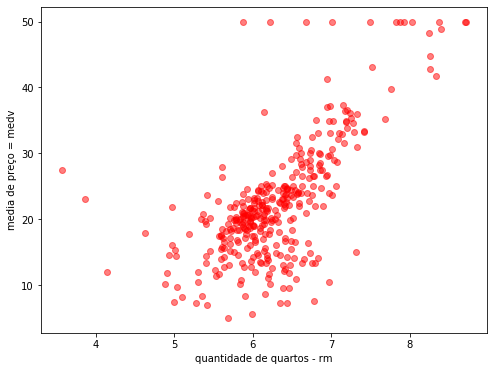

In [114]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, c='red', alpha=0.5)
plt.xlabel("quantidade de quartos - rm")
plt.ylabel("media de preço = medv")
plt.show()

O problema agora é que dado o gráfico, eu quero uma reta que melhor descreve a relação entre o <b>atributo preditor</b> rm(quantidade de quartos) e medv(media de preço)

<b>Hipótese: Reta

medv = theta0 + theta1 * rm</b>

Como fazer isso? Como estimar theta0 e theta1? 

theta0 + theta1 * rm = medv


In [293]:
theta = np.array([[1.0, 1.0]])
alpha = 0.01
iters = 1000000
theta.T

array([[ 1.],
       [ 1.]])

In [294]:
# .reshape(linhas, colunas)
X = X_train.reshape(-1,1)
ones = np.ones([X.shape[0], 1]) # cria matriz de 1's
X = np.concatenate([ones, X],1) # concatena duas matrizes

Y = Y_train.reshape(-1, 1)

In [295]:
def cost(x, y, theta):
    m = len(x)
    # @ means matrix multiplication of arrays. 
    #If we want to use * for multiplication we will have to convert all arrays to matrices
    somatorio = np.power(((x @ theta.T) - y), 2)
    return np.sum(somatorio)/(2*m)

def gradient_descent(x, y, alpha, iters, theta):
    for i in range(iters):
        theta = theta - (alpha/len(x)) * np.sum((x @ theta.T - y) * x , axis=0)
        j = cost(x, y, theta)
        if i % 50000 == 0:
            print("i: {} >> COST: {} ".format(str(i), str(j)))
    return theta, cost

In [296]:
theta, j = gradient_descent(X, Y, alpha, iters, theta)
predict = theta[0][0] + theta[0][1] * X_train

i: 0 >> COST: 71.6395882421 
i: 50000 >> COST: 21.7477925061 
i: 100000 >> COST: 21.7477176354 
i: 150000 >> COST: 21.7477176346 
i: 200000 >> COST: 21.7477176346 
i: 250000 >> COST: 21.7477176346 
i: 300000 >> COST: 21.7477176346 
i: 350000 >> COST: 21.7477176346 
i: 400000 >> COST: 21.7477176346 
i: 450000 >> COST: 21.7477176346 
i: 500000 >> COST: 21.7477176346 
i: 550000 >> COST: 21.7477176346 
i: 600000 >> COST: 21.7477176346 
i: 650000 >> COST: 21.7477176346 
i: 700000 >> COST: 21.7477176346 
i: 750000 >> COST: 21.7477176346 
i: 800000 >> COST: 21.7477176346 
i: 850000 >> COST: 21.7477176346 
i: 900000 >> COST: 21.7477176346 
i: 950000 >> COST: 21.7477176346 


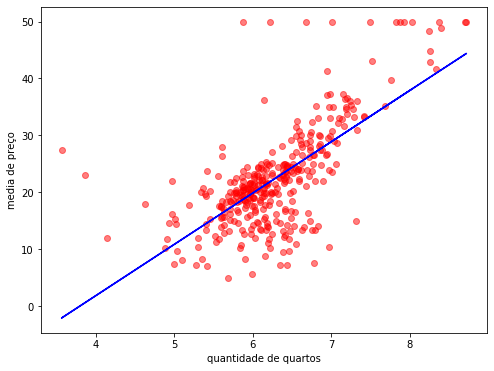

In [292]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, c='red', alpha=0.5)
plt.plot(X_train, predict,c="blue")
plt.xlabel("quantidade de quartos")
plt.ylabel("media de preço")
plt.show()